In [1]:
# Using the infertarde path 

import sys
sys.path.append('../')

In [2]:
# Importing libraries
import pandas as pd
import yfinance as yf
from inferanalytics import infertrade_pyfolio
from infertrade.algos.community import allocations
from infertrade.utilities.performance import calculate_portfolio_performance_python

In [3]:
# Import data
df = yf.download(tickers="AUDUSD=X", start="2010-01-01", end="2020-01-01")
df = df.rename(columns={"Close":"close", "Open":"open", "High":"high", "Low":"low"})
df["date"] = df.index

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()  

,open,high,low,close,Adj Close,Volume,date
Date,,,,,,,
2009-12-31,0.894614,0.901063,0.893176,0.898311,0.898311,0,2009-12-31
2010-01-01,0.898311,0.898473,0.897827,0.898473,0.898473,0,2010-01-01
2010-01-04,0.897424,0.913910,0.894214,0.912492,0.912492,0,2010-01-04
2010-01-05,0.912825,0.917347,0.909504,0.911826,0.911826,0,2010-01-05
2010-01-06,0.911826,0.921914,0.910415,0.920471,0.920471,0,2010-01-06


In [5]:
# Strategy for allocation from the allocation function

df_alloc = allocations.MACD_strategy(df=df, max_investment=0.2)

In [6]:
df_alloc

,open,high,low,close,Adj Close,Volume,date,allocation
Date,,,,,,,,
2009-12-31,0.894614,0.901063,0.893176,0.898311,0.898311,0,2009-12-31,-0.2
2010-01-01,0.898311,0.898473,0.897827,0.898473,0.898473,0,2010-01-01,0.2
2010-01-04,0.897424,0.913910,0.894214,0.912492,0.912492,0,2010-01-04,0.2
2010-01-05,0.912825,0.917347,0.909504,0.911826,0.911826,0,2010-01-05,0.2
2010-01-06,0.911826,0.921914,0.910415,0.920471,0.920471,0,2010-01-06,0.2
...,...,...,...,...,...,...,...,...
2019-12-25,0.692281,0.692713,0.691611,0.692185,0.692185,0,2019-12-25,0.2
2019-12-26,0.692800,0.694203,0.692185,0.692473,0.692473,0,2019-12-26,0.2
2019-12-27,0.694800,0.698600,0.694370,0.694637,0.694637,0,2019-12-27,0.2


In [7]:
# infertrade backtest for calculating the portfolio return

df_portfolio = calculate_portfolio_performance_python(df_with_positions=df_alloc)

In [8]:
df_portfolio

,open,high,low,close,Adj Close,Volume,date,allocation,price,period_start_cash,period_start_securities,start_of_period_allocation,trade_percentage,trading_skipped,period_end_cash,period_end_securities,end_of_period_allocation,security_purchases,cash_flow,portfolio_return
Date,,,,,,,,,,,,,,,,,,,,
2009-12-31,0.894614,0.901063,0.893176,0.898311,0.898311,0,2009-12-31,-0.2,0.898311,1.000000,0.000000,0.000000,-0.200000,0.0,1.200000,-0.222640,-0.2,-0.222640,0.200000,1.000000
2010-01-01,0.898311,0.898473,0.897827,0.898473,0.898473,0,2010-01-01,0.2,0.898473,1.200000,-0.222640,-0.200043,0.400043,0.0,0.799971,0.222592,0.2,0.445232,-0.400029,0.999964
2010-01-04,0.897424,0.913910,0.894214,0.912492,0.912492,0,2010-01-04,0.2,0.912492,0.799971,0.222592,0.202489,-0.002489,0.0,0.802468,0.219856,0.2,-0.002736,0.002496,1.003085
2010-01-05,0.912825,0.917347,0.909504,0.911826,0.911826,0,2010-01-05,0.2,0.911826,0.802468,0.219856,0.199883,0.000117,0.0,0.802351,0.219984,0.2,0.000128,-0.000117,1.002938
2010-01-06,0.911826,0.921914,0.910415,0.920471,0.920471,0,2010-01-06,0.2,0.920471,0.802351,0.219984,0.201514,-0.001514,0.0,0.803872,0.218332,0.2,-0.001653,0.001521,1.004840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.692281,0.692713,0.691611,0.692185,0.692185,0,2019-12-25,0.2,0.692185,0.789048,0.284847,0.199923,0.000077,0.0,0.788972,0.284957,0.2,0.000110,-0.000076,0.986215
2019-12-26,0.692800,0.694203,0.692185,0.692473,0.692473,0,2019-12-26,0.2,0.692473,0.788972,0.284957,0.200066,-0.000066,0.0,0.789037,0.284862,0.2,-0.000095,0.000066,0.986297
2019-12-27,0.694800,0.698600,0.694370,0.694637,0.694637,0,2019-12-27,0.2,0.694637,0.789037,0.284862,0.200500,-0.000500,0.0,0.789531,0.284152,0.2,-0.000710,0.000493,0.986913


In [9]:
# Converting cumulative return to Non-cumulative return for infertrade pyfolio wrapper

df_portfolio["diff_return"] = df_portfolio["portfolio_return"].diff().fillna(0)

In [10]:
# using the timestamp as index 

df_portfolio = df_portfolio.set_index("date")

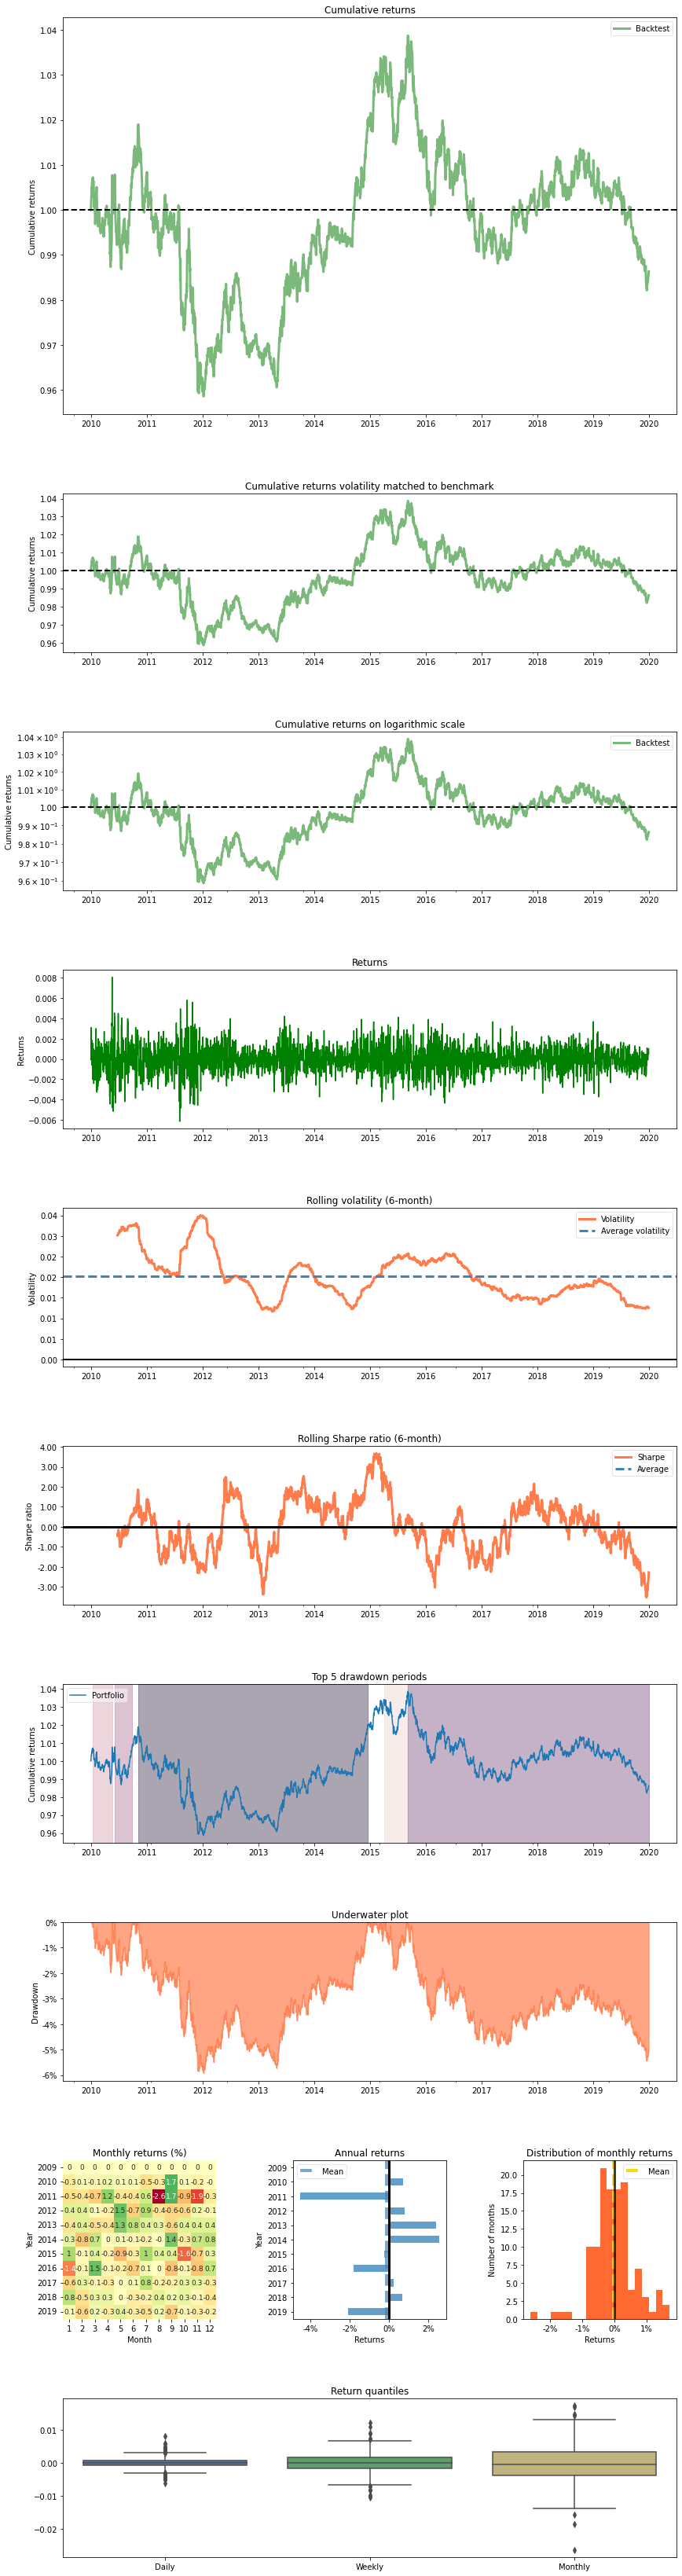

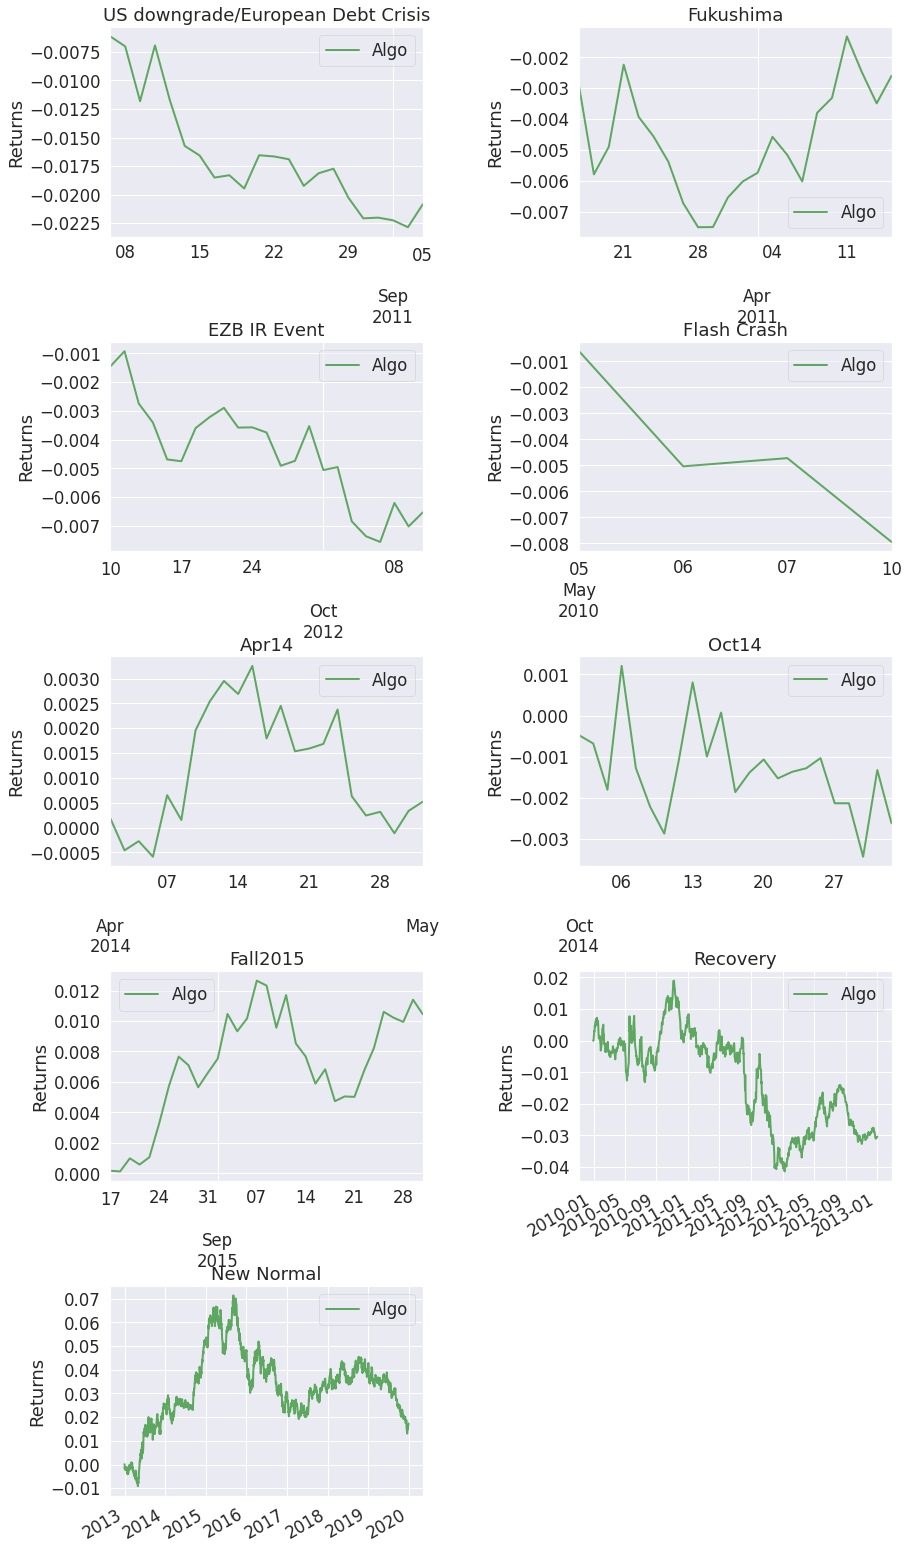

In [14]:
# extensive Infertrade analysis on returns
# need to set notebook as true for Jupyter notebook user and pdf is optional
# pdf is available where the notebook is present

infertrade_pyfolio.infertrade_full_tear_sheet(returns=df_portfolio["diff_return"],
                                              NoteBook=True, pdf=True)